# Gap Depth

## Subject of the exercise

In this exercise we will study how planet mass affects whether a gap is opened and how deep it is.

A typicl measure for this mass is the thermal mass $M_\text{th} = h_p^3 M_*$ where $h_p$ is the aspect ratio at the planet location.

In [1]:
example_name = "gapdepth"
!mkdir -p $example_name
import os
os.chdir(example_name)

Setup

We'll take the example setup file from the examples directory and modify it in python.

We will now create three config files simulations with different planet masses.

In [2]:
# make a copy of the default file

src_config = "../../config.yml"

import ruamel.yaml
yaml = ruamel.yaml.YAML()

planet_masses = [1e-5, 1e-4, 1e-3]

for Mp in planet_masses:
    
    config_file = f"setup_M{Mp:.1e}.yml"
    !cp $src_config $config_file

    with open(config_file, "r") as infile:
        config = yaml.load(infile)
    
    config["nbody"][1]["mass"] = f"{Mp} solMass"
    config["DT"] = 0.314 # monitor scalar files around every half orbit
    config["Ninterm"] = 20 # write a snapshot every orbit
    config["Ntot"] = 300 # wirte 10 snapshots
    # use very low resolution by setting it to 2 cell per scaleheight, cps
    config["cps"] = 2
    
    config["OutputDir"] = f"output/out_M{Mp:.1e}"


    # write the file to disk
    with open(config_file, "w") as outfile:
        yaml.dump(config, outfile)

## Run the simulation

Now we can run all three simulations.

Here is how to start one of them:

In [3]:
cwd = os.getcwd()
cmd = f"cd {cwd} && run_fargo -np 1 -nt 4 auto {config_file}"
print(cmd)

cd /home/thomas/repo/spp1992-fargo-tutorial/notebooks/gapdepth && run_fargo -np 1 -nt 4 auto setup_M1.0e-03.yml


## Plotting the results

In [4]:
import os
import disgrid
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, '$\\Sigma$ [g/cm2]$')

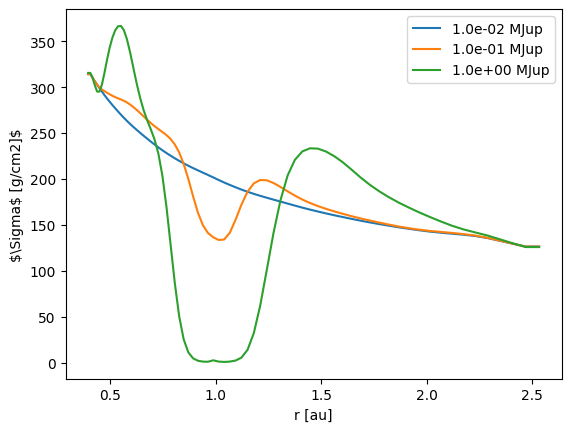

In [5]:
fig, ax = plt.subplots()

for outdir in os.listdir("output"):
    
    d = disgrid.Data(f"output/{outdir}")
    avail = d.avail()
    
    Nlast = avail["Nlast"]
    
    Sigma = d.get(dim="2d", var="mass density", N=Nlast)
    
    r_au = Sigma.grid.get_coordinates("r").to_value("au")
    vals2d = Sigma.data.to_value("g/cm2")
    
    # azimuthally average 2d array
    vals1d = np.average(vals2d, axis=1)
    
    Mp = d.get(planet=1, var="mass").data[0].to_value("jupiterMass")
    
    ax.plot(r_au, vals1d, label=f"{Mp:.1e} MJup")
    
ax.legend()
ax.set_xlabel("r [au]")
ax.set_ylabel(r"$\Sigma$ [g/cm2]$")